# Import necessary libraries.

In [ ]:
import spacy
import textacy
import textacy.preprocessing
import textacy.resources
#import textacy.keyterms
import textacy.ke
import neuralcoref
from spacy.symbols import ORTH, POS, NOUN, VERB,PRON
import networkx as nx
import matplotlib.pyplot as plt 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from networkx.readwrite import json_graph;
import json
from afinn import Afinn
afn = Afinn()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
lemmatizer = WordNetLemmatizer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from allennlp_models.pretrained import load_predictor
predictor = load_predictor("roberta-sst")
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath('C:/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('C:/SentStrength_Data_Sept2011/')
import pandas as pd
from IPython.display import display
import collections
from nltk.corpus import stopwords
set(stopwords.words('english'))

nlp = spacy.load("en_core_web_sm")
neuralcoref.add_to_pipe(nlp)

# Read text file and preprocess.

In [151]:
#from spacy.lang.en import English

file_name = './Text/Simplified Medical Text.txt'
#file_name = 'input.txt'
narrative = open(file_name, encoding="utf8").read()

narrative = textacy.preprocessing.normalize_quotation_marks(narrative)
#narrative = textacy.preprocessing.remove_punctuation(narrative, marks=",;:")
#narrative = textacy.preprocessing.normalize_whitespace(narrative)
#narrative = textacy.make_spacy_doc(narrative)
narrative = narrative.lower()
narrative = nlp(narrative)

#narrative._.coref_clusters
#narrative._.coref_resolved

print('Original Narrative:')
print(narrative)
#print('\n')
print('Extracted Coreferences:')
print(narrative._.coref_clusters)
print('\n')
narrative = narrative._.coref_resolved
print('Narrarive after resolving coreferences:')
print(narrative)

raw_sentences = sent_tokenize(narrative)
#nlp.add_pipe(nlp.create_pipe('sentencizer')) # updated
narrative = nlp(narrative)
#sentences = [sent.string.strip() for sent in narrative.sents]
#narrative = nlp(narrative)

print('\nSpacy Sentences:\n')
for sent in narrative.sents:
    print(sent.text)

print('\nNLTK Sentences:\n')
for sent in raw_sentences:
    print(sent)

Original Narrative:
excessive overthinking leads to insomnia. stress caused insomnia. insomnia causes stress. stress results in insomnia. stress caused my insomnia. overthinking can increase anxiety. overthinking can cause insomnia. stress is a reason of my insomnia. stress results to insomnia.
Extracted Coreferences:
[insomnia: [insomnia, insomnia, insomnia, insomnia, my insomnia, insomnia, my insomnia, insomnia]]


Narrarive after resolving coreferences:
excessive overthinking leads to insomnia. stress caused insomnia. insomnia causes stress. stress results in insomnia. stress caused insomnia. overthinking can increase anxiety. overthinking can cause insomnia. stress is a reason of insomnia. stress results to insomnia.

Spacy Sentences:

excessive overthinking leads to insomnia.
stress caused insomnia.
insomnia causes stress.
stress results in insomnia.
stress caused insomnia.
overthinking can increase anxiety.
overthinking can cause insomnia.
stress is a reason of insomnia.
stress r

# Extract the Subject-Verb-Object triples.

In [152]:
for sent in narrative.sents:
    #print("Heyyyy!")
    print(sent)
    for tok in sent:
        print(tok.text,tok.pos_,tok.dep_)

excessive overthinking leads to insomnia.
excessive ADJ amod
overthinking NOUN nsubj
leads VERB ROOT
to ADP prep
insomnia PROPN pobj
. PUNCT punct
stress caused insomnia.
stress NOUN nsubj
caused VERB ROOT
insomnia PROPN dobj
. PUNCT punct
insomnia causes stress.
insomnia PROPN nsubj
causes VERB ROOT
stress NOUN dobj
. PUNCT punct
stress results in insomnia.
stress NOUN nsubj
results VERB ROOT
in ADP prep
insomnia PROPN pobj
. PUNCT punct
stress caused insomnia.
stress NOUN nsubj
caused VERB ROOT
insomnia PROPN dobj
. PUNCT punct
overthinking can increase anxiety.
overthinking NOUN nsubj
can VERB aux
increase VERB ROOT
anxiety NOUN dobj
. PUNCT punct
overthinking can cause insomnia.
overthinking NOUN nsubj
can VERB aux
cause VERB ROOT
insomnia PROPN dobj
. PUNCT punct
stress is a reason of insomnia.
stress NOUN nsubj
is AUX ROOT
a DET det
reason NOUN attr
of ADP prep
insomnia NOUN pobj
. PUNCT punct
stress results to insomnia.
stress NOUN nsubj
results VERB ROOT
to ADP prep
insomnia PR

In [153]:
#new
finalList = []
sentences = []
ncl = []
nncl = [()]
checkPass = False
rootCheck = False
varForm1 = False
varForm2 = False
#tuple =('a','b','c')

#print(tuple[0])

for sent in narrative.sents:
    print("Sentence:")
    print(sent)
    
    print("Noun Chunks:")
    for nc in sent.noun_chunks:
        print (nc)
        ncl.append(nc)
    print ("Number of noun chunks: ", len(ncl))
    
    triplets = textacy.extract.subject_verb_object_triples(sent)
    triplets = list(triplets)
    if len(triplets) > 0:
        print("Triples from textacy:")
        for t in triplets:
            subject = str(t[0])
            objec = str(t[2])
            for chunk in ncl:
                for cToken in chunk:
                    if str(cToken) == str(t[0]):
                        subject = str(chunk)
                    if str(cToken) == str(t[2]):
                        objec = str(chunk)
            tup = (subject,str(t[1]),objec)
            print(tup)
            finalList.append(tup)
            sentences.append(sent)
        if len(ncl) == 3:
            nncl = [(ncl[0],triplets[0][1],ncl[1])]
            nncl.append((ncl[0],triplets[0][1],ncl[2]))
            print("Triples other than textacy:")
            print(nncl[0])
            print(nncl[1])
            finalList.append(nncl[0])
            sentences.append(sent)
            finalList.append(nncl[1])
            sentences.append(sent)
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],triplets[0][1],ncl[1])]
#            print("Triples other than textacy:")
#            print(nncl[0])
#            finalList.append(nncl[0])
    else:
        print("Method from textacy; subject_verb_object_triples extracted nothing!")
        for token in sent:
            #print(token.text, token.dep_,)
            if token.dep_ == 'nsubj':
                sub = token.text
                #tuple[0] = str(token.text)
            elif token.dep_ == 'nsubjpass':
                checkPass = True
                sub = token.text
            elif token.dep_ == 'ROOT':
                #print("Heyyyyyyy")
                verb = token.text
                rootCheck = True
            elif token.pos_ == 'NOUN' and token.dep_ == 'conj':
                if rootCheck is True:
                    varForm2 = True
                else:
                    varForm1 = True
                #tuple[1] = token.text
            #elif token.dep_ == 'dobj':
            #    obj = token.text
                #tuple[2] = token.text
            #    break
            else:
                if token.dep_ == 'dobj':
                    obj = token.text
                    continue
                elif token.dep_ == 'pobj':
                    obj = token.text
                    continue
                
        for nChunk in ncl:
            for nToken in nChunk:
                if str(nToken) == str(sub):
                    sub = nChunk
                if str(nToken) == str(obj):
                    obj = nChunk
        if checkPass is True:
            tuple = (obj,verb,sub)
        else:
            tuple = (sub,verb,obj)
        print("Triple by combining nsubj, root and dobj:")
        print(tuple)
        finalList.append(tuple)
        sentences.append(sent)
        if len(ncl) == 3:
            if varForm1 == True:
                nncl = [(ncl[0],verb,ncl[2])]
                nncl.append((ncl[1],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
            else:
                nncl = [(ncl[0],verb,ncl[1])]
                nncl.append((ncl[0],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
            
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],verb,ncl[1])]
#            print("Triples other than sub, verb and obj:")
#            print(nncl[0])
#            finalList.append(nncl[0])

    ncl.clear()
    nncl.clear()
    rootCheck = False
    checkPass = False
    varForm1 = False
    varForm2 = False
    
trips = finalList

#        for token in nc:
#            print(token.text, token.dep_)

Sentence:
excessive overthinking leads to insomnia.
Noun Chunks:
excessive overthinking
insomnia
Number of noun chunks:  2
Method from textacy; subject_verb_object_triples extracted nothing!
Triple by combining nsubj, root and dobj:
(excessive overthinking, 'leads', insomnia)
Sentence:
stress caused insomnia.
Noun Chunks:
stress
insomnia
Number of noun chunks:  2
Triples from textacy:
('stress', 'caused', 'insomnia')
Sentence:
insomnia causes stress.
Noun Chunks:
insomnia
stress
Number of noun chunks:  2
Triples from textacy:
('insomnia', 'causes', 'stress')
Sentence:
stress results in insomnia.
Noun Chunks:
stress
insomnia
Number of noun chunks:  2
Method from textacy; subject_verb_object_triples extracted nothing!
Triple by combining nsubj, root and dobj:
(stress, 'results', insomnia)
Sentence:
stress caused insomnia.
Noun Chunks:
stress
insomnia
Number of noun chunks:  2
Triples from textacy:
('stress', 'caused', 'insomnia')
Sentence:
overthinking can increase anxiety.
Noun Chunks:


In [ ]:
#old
def SVO(narrative):
    ncl = []
    fl = []
    nncl = [()]
    for sent in narrative.sents:
        #sent = str(sent)
        print("\n" + str(sent))
        for nc in sent.noun_chunks:
            print (nc)
            ncl.append(nc)
        print(len(ncl))       
        triplets = textacy.extract.subject_verb_object_triples(sent)
        triplets = list(triplets)
        if len(ncl) <= 3:
            if len(triplets) == 0:
                print("Method from textacy; subject_verb_object_triples extracted nothing!")
                for token in sent:
                #print(token.text, token.dep_,)
                    if token.dep_ == 'ROOT':
                        text = token.text
                        break
                    #print(token.text)
                if len(ncl) == 3:
                        nncl = [(ncl[0],token.text,ncl[1])]
                        nncl.append((ncl[0],token.text,ncl[2]))
                        fl.append(nncl[0])
                        fl.append(nncl[1])
                elif len(ncl) == 2:
                        nncl = [(ncl[0],token.text,ncl[1])]
                        fl.append(nncl[0])
                else:
                    continue
                print("Triples without textacy.")
                print(nncl)
        
            else:
                print(triplets)
                for t in triplets:
                    print(t)
                    fl.append(t)
                if len(ncl) == 3:
                    nncl = [(ncl[0],triplets[0][1],ncl[1])]
                    nncl.append((ncl[0],triplets[0][1],ncl[2]))
                    fl.append(nncl[0])
                    fl.append(nncl[1])
                    #print(nncl[0])
                    #print(nncl[1])
                elif len(ncl) == 2:
                    nncl = [(ncl[0],triplets[0][1],ncl[1])]
                    fl.append(nncl[0])
                else:
                    continue;
                print(nncl)
        ncl.clear()
        nncl.clear()
    return fl

trips = SVO(narrative)

# Print the extracted triples.

In [154]:
for sentence, triple  in zip(sentences, trips):
    print(sentence, triple)

excessive overthinking leads to insomnia. (excessive overthinking, 'leads', insomnia)
stress caused insomnia. ('stress', 'caused', 'insomnia')
insomnia causes stress. ('insomnia', 'causes', 'stress')
stress results in insomnia. (stress, 'results', insomnia)
stress caused insomnia. ('stress', 'caused', 'insomnia')
overthinking can increase anxiety. ('overthinking', 'can increase', 'anxiety')
overthinking can cause insomnia. ('overthinking', 'can cause', 'insomnia')
stress is a reason of insomnia. (stress, 'is', insomnia)
stress is a reason of insomnia. (stress, 'is', a reason)
stress is a reason of insomnia. (stress, 'is', insomnia)
stress results to insomnia. (stress, 'results', insomnia)


# Plot the knowledge Graph.

6
6


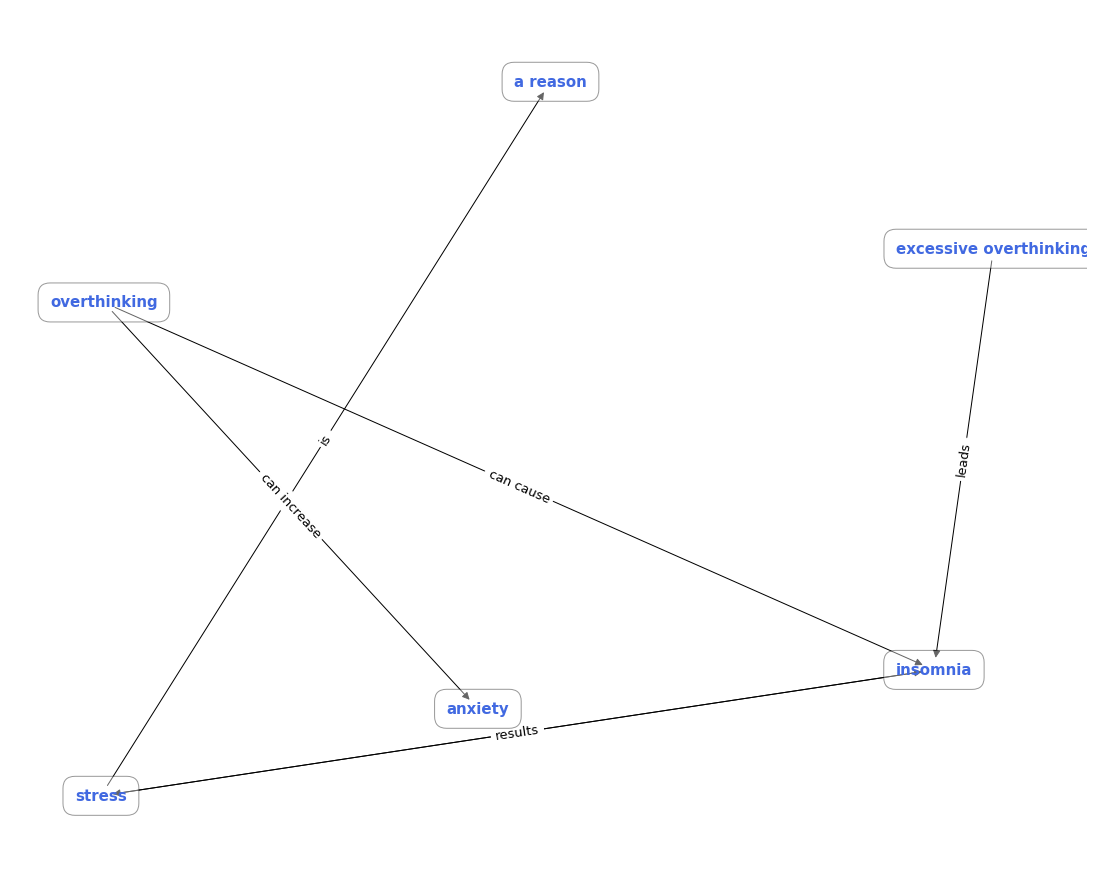

In [155]:
cmap = nx.DiGraph()

for triple in trips:
    s = str(triple[0])    
    d = str(triple[2])
    cmap.add_edge(s, d, predicade=triple[1])

print(len(cmap.nodes))
print(len(cmap.edges))

pos = nx.spring_layout(cmap, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cmap, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cmap.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cmap,'predicade')
nx.draw_networkx_edge_labels(cmap, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Dump the Knowledge Graph on "Knowledge Graph.json" file for                           semi-automation.

In [134]:
knowledgeGraph = nx.DiGraph()

for svo in trips:
    s = str(svo[0])    
    d = str(svo[2])
    knowledgeGraph.add_node(s,id = str(s),title=str(s),x=615,y=200)
    knowledgeGraph.add_node(d,id = str(d),title=str(d),x=615,y=200)
    knowledgeGraph.add_edge(s, d, predicade=str(svo[1]))

#print(len(knowledgeGraph.nodes))
#print(len(knowledgeGraph.edges))

data = json_graph.node_link_data(knowledgeGraph)


out_file = open("./Json Graphs/Knowledge Graph.json", "w")
  
json.dump(data, out_file, indent = 6)
  
out_file.close()

# Create Causal Trigger Words Dictionary along with their synonyms.

In [156]:
#new

causalWords1 = ["forced","caused", "resulted", "reason", "as a result of", "as a consequence of", 
               "consequence", "consequently", "affect", "because", "increase", "decrease","due to","because of"
               ,"made","mimimize","maximize","hindered", "displaced", "conspired","led to","activate","impel","inspire",
                "excite","quicken","rouse","stimulate","influence","determine","likely","probable","disconnected","separated"
                ,"excluded","after","as","since","trigger"]

#causalWords1 = ["forced"]
synonyms1 = []
lemma_function = WordNetLemmatizer()

for cw1 in causalWords1:
    #print(cw1)
    synonyms1.append(cw1.lower())
    tokens1 = word_tokenize(cw1)
    for token1, tag1 in pos_tag(tokens1):
        lemma1 = lemma_function.lemmatize(token1)
        #print(token1,lemma1)
        
        for syn in wordnet.synsets(str(lemma1)):
            
            for l1 in syn.lemmas():
                #print(l1)
                #synonyms1.append(lemma1.lower())
                synonyms1.append(l1.name().lower())
                #print(l1)
                for syn1 in wordnet.synsets(str(l1.name())):
                    for l2 in syn1.lemmas():
                        #print(l2)
                        synonyms1.append(l2.name().lower())
            
print(len(synonyms1))
#print(set(synonyms1))
#for synonym in synonyms1:
#    print(synonym+",")

27499


In [ ]:
#old

causalWords = ["forced","caused", "result", "reason", "as a result of", "as a consequence of", 
               "consequence", "consequently", "affect", "because", "increase", "decrease","due to","because of"
               ,"made","mimimize","maximize","led to","produced"]

#causalWords = ["as a result of"]
synonyms = []

for cw in causalWords:
    
    for syn in wordnet.synsets(str(cw)):
        for l in syn.lemmas():
            synonyms.append(cw)
            synonyms.append(l.name())
        
print(set(synonyms))
print(len(synonyms))

# Filter Causal triples from SVO triples based upon causal trigger                           words dictionary.

In [157]:
causeffect = []
causalSentences = []
#lem = []
#lemma_function = WordNetLemmatizer()
for s,st in zip(sentences,trips):
    #st = (str(st[0]),str(st[1]),str(st[2]))
    #synonym = synonym[0]
    tokens = word_tokenize(str(st[1]))
    for token, tag in pos_tag(tokens):
        lemma = lemma_function.lemmatize(token)
        #print(token,lemma)
        #st[1] = lemma
        #lem.append(lemma)
        
    for synonym in synonyms1:
        if synonym == lemma:
            #causeffect = [(st[0],st[1],st[2])]
            #strTriples.append((ncl[0],token.text,st[2]))
           # print(st)
            causeffect.append(st)
            causalSentences.append(s)
            #if (len(causeffect) >0 ) and (st in causeffect == False):
                
            #    causeffect.append(st)
            break
    
#causeffect.sort(key = lambda x: x[0])

#for sortedTriple in causeffect:
#    print(sortedTriple)

for causalSentence, causalTriple  in zip(causalSentences, causeffect):
    print(causalSentence, causalTriple)

excessive overthinking leads to insomnia. (excessive overthinking, 'leads', insomnia)
stress caused insomnia. ('stress', 'caused', 'insomnia')
insomnia causes stress. ('insomnia', 'causes', 'stress')
stress results in insomnia. (stress, 'results', insomnia)
stress caused insomnia. ('stress', 'caused', 'insomnia')
overthinking can increase anxiety. ('overthinking', 'can increase', 'anxiety')
overthinking can cause insomnia. ('overthinking', 'can cause', 'insomnia')
stress results to insomnia. (stress, 'results', insomnia)


# Plot the Causal Graph.

5
5


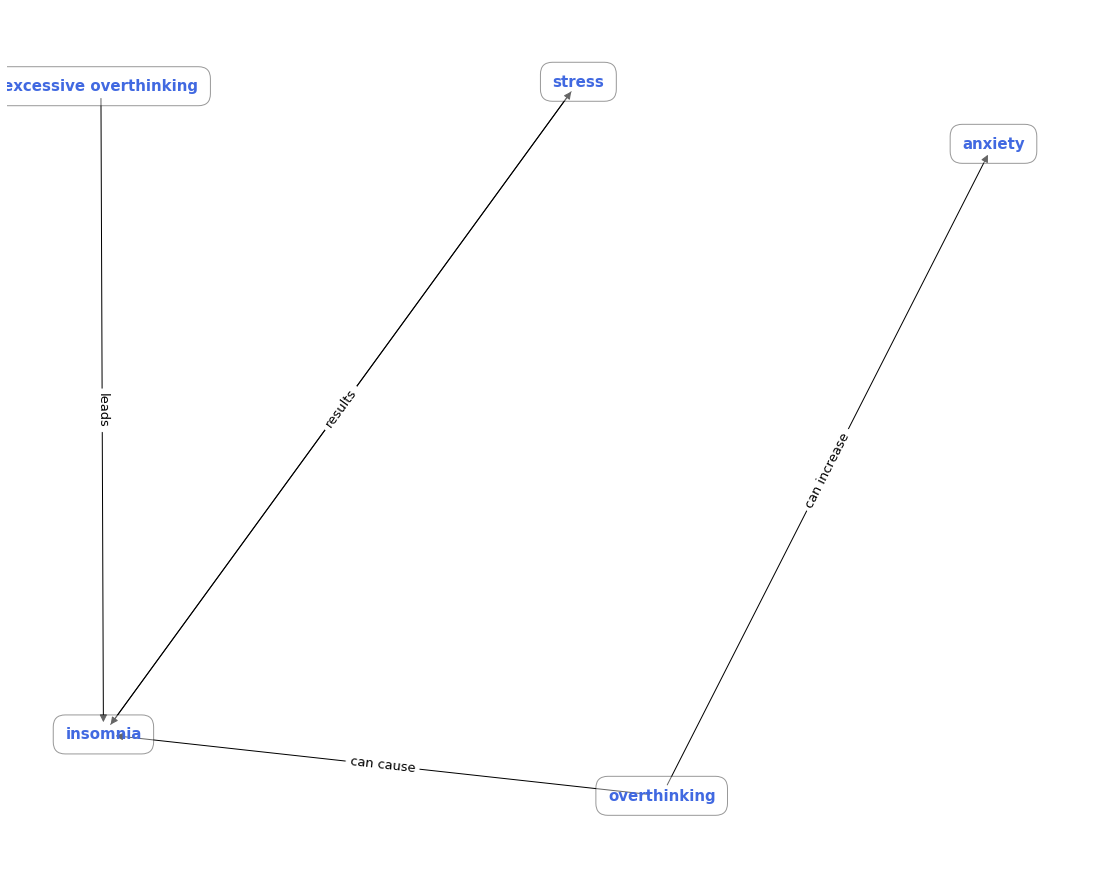

In [158]:
cg = nx.DiGraph()

for ce in causeffect:
    s = str(ce[0])    
    d = str(ce[2])
    cg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    cg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cg.add_edge(s, d, predicade=str(ce[1]))

print(len(cg.nodes))
print(len(cg.edges))

pos = nx.spring_layout(cg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cg,'predicade')
nx.draw_networkx_edge_labels(cmap, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Remove Duplicates from causalSentences

In [159]:
causalSentences = list(dict.fromkeys(causalSentences))
#causalSentences = list(set(causalSentences))

#causalSentences1 = []
#for c in causalSentences:
#    if c not in causalSentences1:
#        #print(c)
#        causalSentences1.append(c)

causalSentences

[excessive overthinking leads to insomnia.,
 stress caused insomnia.,
 insomnia causes stress.,
 stress results in insomnia.,
 stress caused insomnia.,
 overthinking can increase anxiety.,
 overthinking can cause insomnia.,
 stress results to insomnia.]

# Causal Sentences' Polarity (Sentence Level) 

### [AllenNlp] 

In [160]:
#https://demo.allennlp.org/sentiment-analysis/roberta-sentiment-analysis
#https://paperswithcode.com/model/roberta-large-sst

#output (Pos,neg)

#sentence = "Enemies surround Pakistan."
#preds = predictor.predict(sentence)
#print(f"p(positive)={preds['probs'][0]:.2%}")
allen = []
for sent in causalSentences:
    #print(sent)
    preds = predictor.predict(str(sent))
    #print(preds['label'][0])
    label = preds['label'][0]
    if label is '0':
        allen.append(-1)
    else:
        allen.append(1)
    
for causalSentence, polarity  in zip(causalSentences, allen):
    print(causalSentence, polarity)

excessive overthinking leads to insomnia. -1
stress caused insomnia. -1
insomnia causes stress. -1
stress results in insomnia. -1
stress caused insomnia. -1
overthinking can increase anxiety. -1
overthinking can cause insomnia. -1
stress results to insomnia. -1


### [Afinn]

In [161]:
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-affin/

#output (Pos,neg,neural)

afinn = []
for sent in causalSentences:
    #print(sent)
    score = afn.score(str(sent))
    #print(score)
    if score > 0:
        #print('positive')
        afinn.append(1)
    elif score < 0:
        #print('negative')
        afinn.append(-1)
    else:
        #print('neutral')
        afinn.append(0)
        
for causalSentence, polarity  in zip(causalSentences, afinn):
    print(causalSentence, polarity)

excessive overthinking leads to insomnia. -1
stress caused insomnia. -1
insomnia causes stress. -1
stress results in insomnia. -1
stress caused insomnia. -1
overthinking can increase anxiety. -1
overthinking can cause insomnia. -1
stress results to insomnia. -1


### [Vader]

In [162]:
#https://github.com/cjhutto/vaderSentiment#about-the-scoring
#output (Pos,neg,neural)

vader = []

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    #print(vs)
    return vs['compound']

def vader_analysis(compound):
    if compound >= 0.05:
        vader.append(1)
        return 'Positive'
    elif compound <= -0.05 :
        vader.append(-1)
        return 'Negative'
        
    elif  compound > -0.05 and compound < 0.05:
        vader.append(0)
        return 'Neutral'
    
for sent in causalSentences:
    #print(sent)
    compound = vadersentimentanalysis(str(sent))
    vader_analysis(compound)
    
for causalSentence, polarity  in zip(causalSentences, vader):
    print(causalSentence, polarity)

excessive overthinking leads to insomnia. 0
stress caused insomnia. -1
insomnia causes stress. -1
stress results in insomnia. -1
stress caused insomnia. -1
overthinking can increase anxiety. 1
overthinking can cause insomnia. 0
stress results to insomnia. -1


### [SentiStrength]

In [163]:
#http://sentistrength.wlv.ac.uk/
#http://paper.ijcsns.org/07_book/202001/20200107.pdf
#https://pypi.org/project/sentistrength/
#http://sentistrength.wlv.ac.uk/results.php?text=pakistan+must+support+army+and+aq+khan.&submit=Detect+Sentiment&result=trinary
#https://professorkhan.com/2019/03/29/sentiment-analysis-with-sentistrength/
#output (Pos,neg)

sentiStrength = []

for sent in causalSentences:
    #print(sent)
    result = senti.getSentiment(str(sent), score='binary')
    #print(result)
    
    if result[0]==1:
        #print('Positive')
        sentiStrength.append(1)
    elif result[0]==-1:
        sentiStrength.append(-1)
        #print('Negative')
    #else:
    #    print('Neutral')

for causalSentence, polarity  in zip(causalSentences, sentiStrength):
    print(causalSentence, polarity)

excessive overthinking leads to insomnia. -1
stress caused insomnia. -1
insomnia causes stress. -1
stress results in insomnia. -1
stress caused insomnia. -1
overthinking can increase anxiety. -1
overthinking can cause insomnia. 1
stress results to insomnia. -1


### [SentiWordnet]

In [ ]:
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

def sentiment_sentiwordnet(text):
    #text = text.decode("utf-8")
    raw_sentences = sent_tokenize(text)
    #print(raw_sentences)
    sentiment = 0
    tokens_count = 0
    
    for raw_sentence in raw_sentences:
        print(raw_sentence)
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        print(tagged_sentence)
        
        for word, tag in tagged_sentence:
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
                
            #lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            #if not lemma:
            #    continue
                
            synsets = wn.synsets(word, pos=wn_tag)
            if not synsets:
                continue
                
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += swn_synset.pos_score() - swn_synset.neg_score()
            tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            return 0
        if sentiment>0:
            #return "Positive"
            print("Positive")
        elif sentiment==0:
            #return "Neutral"
            print("Neutral")
        else:
            #return "Negative"
            print("Negative")
    
causalNarrative = ""
for cS in causalSentences:
    causalNarrative = causalNarrative+str(cS)+" "

causalNarrative = nlp(causalNarrative)
#raw_sentences = sent_tokenize(causalNarrative)
#print(str(causalNarrative)+"\n")
#print(raw_sentences) 
#print(str(narrative))

sentiment_sentiwordnet(str(narrative))

### [SentiWordNet OnlyVerbs]

In [ ]:
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.tag import pos_tag
import nltk
    

polarizedCauseffect = []
for ce in causeffect:
    print(ce[1])
    token = nltk.word_tokenize(str(ce[1]))
    after_tagging = nltk.pos_tag(token)
    print(after_tagging)
    print(len(after_tagging))
    for tag in after_tagging:
        if tag[1].startswith('V') or len(after_tagging)==1:
            words = swn.senti_synsets(tag[0]) 
            answer = list(words)[0]
            if (answer.pos_score() > answer.neg_score()):
                mce = str(ce[1])+"(+ve)"
                ce1=(ce[0],mce,ce[2])
                polarizedCauseffect.append(ce1)
                print(ce1)
            elif (answer.pos_score() > 0):
                mce = str(ce[1])+"(-ve)"
                ce1=(ce[0],mce,ce[2])
                polarizedCauseffect.append(ce1)
                print(ce1)
            else: 
                mce = str(ce[1])+"(neutral)"
                ce1=(ce[0],mce,ce[2])
                polarizedCauseffect.append(ce1)
                print(ce1)
                
polarizedCauseffect

# Data Frame (Sentence Level)

In [164]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

df2 = pd.DataFrame(list(zip(causalSentences, allen, afinn, vader,sentiStrength)), columns =['Causal Sentence', 'AllenNLP','Afinn','Vader','SentiStrength'])
df2["Weight"] = df2.sum(axis=1)


sentPolarity = []

for index, row in df2.iterrows():
    weight = row['Weight']
    #print(weight)
    if weight is -4:
        sentPolarity.append('Strong Negative') 
        #print('Strong Negative')
    elif weight is -3:
        sentPolarity.append('Moderate Negative')
        #print('Moderate Negative')
    elif weight is -2:
        sentPolarity.append('Mild Negative')
        #print('Mild Negative')
    elif weight is -1:
        sentPolarity.append('Weak Negative')
        #print('Weak Negative')
    elif weight is 0:
        sentPolarity.append('Neutral')
        #print('Neutral')
    elif weight is 4:
        sentPolarity.append('Strong Positive')
        #print('Strong Positive')
    elif weight is 3:
        sentPolarity.append('Moderate Positive')
        #print('Moderate Positive')
    elif weight is 2:
        sentPolarity.append('Mild Positive')
        #print('Mild Positive')
    elif weight is 1:
        sentPolarity.append('Weak Positive')
        #print('Weak Positive')

df2["Polarity"] = sentPolarity
df2.style

# Causal Sentences' Polarity (Word Level) 

### Generating list of tokens without stop words and punctuation marks.

In [165]:
marks = ['.',',','(',')','-',':',';','/',"'s",'_','__','--','"', '’', '—']
token_list = []
token_tuple = []

for sent in causalSentences:
    for token in sent:
        if str(token) not in marks:
            if str(token) not in stopwords.words():
                token_tuple.append(str(token))
    token_list.append(token_tuple)
    token_tuple = []
    
print(len(token_list))
print(token_list)

8
[['excessive', 'overthinking', 'leads', 'insomnia'], ['stress', 'caused', 'insomnia'], ['insomnia', 'causes', 'stress'], ['stress', 'results', 'insomnia'], ['stress', 'caused', 'insomnia'], ['overthinking', 'increase', 'anxiety'], ['overthinking', 'cause', 'insomnia'], ['stress', 'results', 'insomnia']]


### [AllenNlp] 

In [166]:
allen_word = []
allen_tuple = []

for tokenTuple in token_list:
    #print(sent)
    for token in tokenTuple:
        #if str(token) not in marks: 
            #print(token)
        preds = predictor.predict(str(token))
            #print(preds['label'][0])
        label = preds['label'][0]
        if label is '0':
            allen_tuple.append(-1)
                #allen_word.append(-1)
        else:
                #allen_word.append(1)
            allen_tuple.append(1)
    allen_word.append(allen_tuple)
    allen_tuple = []
                
for a in allen_word:
    print(len(a))
    print(a)

4
[-1, -1, 1, -1]
3
[-1, 1, -1]
3
[-1, 1, -1]
3
[-1, 1, -1]
3
[-1, 1, -1]
3
[-1, 1, -1]
3
[-1, 1, -1]
3
[-1, 1, -1]


### [Afinn] 

In [167]:
afinn_word = []
afinn_tuple = []

for tokenTuple in token_list:
    #print(sent)
    for token in tokenTuple:
        #if str(token) != ".": #or str(token) != ',' or str(token) != "-":
        #if str(token) not in marks:
            #print(token)
        score = afn.score(str(token))
        if score > 0:
                #print('positive')
            afinn_tuple.append(1)
        elif score < 0:
                #print('negative')
            afinn_tuple.append(-1)
        else:
                #print('neutral')
            afinn_tuple.append(0)
    afinn_word.append(afinn_tuple)
    afinn_tuple = []

for a in afinn_word:
    print(len(a))
    print(a)

4
[0, 0, 0, -1]
3
[-1, 0, -1]
3
[-1, 0, -1]
3
[-1, 0, -1]
3
[-1, 0, -1]
3
[0, 1, -1]
3
[0, 0, -1]
3
[-1, 0, -1]


### [Vader] 

In [168]:
vader_word = []
vader_tuple = []

for tokenTuple in token_list:
    #print(sent)
    for token in tokenTuple:
        #if str(token) not in marks:
        vs = analyzer.polarity_scores(str(token))
        compound = vs['compound']
        if compound >= 0.05:
            vader_tuple.append(1)   
        elif compound <= -0.05 :
            vader_tuple.append(-1)
        elif  compound > -0.05 and compound < 0.05:
            vader_tuple.append(0)
    vader_word.append(vader_tuple)
    vader_tuple = []

for a in vader_word:
    print(len(a))
    print(a)

4
[0, 0, 0, 0]
3
[-1, 0, 0]
3
[0, 0, -1]
3
[-1, 0, 0]
3
[-1, 0, 0]
3
[0, 1, -1]
3
[0, 0, 0]
3
[-1, 0, 0]


### [SentiStrength] 

In [169]:
senti_word = []
senti_tuple = []


for tokenTuple in token_list:
    #print(sent)
    for token in tokenTuple:
        #if str(token) not in marks:
            #print(token)
        result = senti.getSentiment(str(token), score='binary')
            #print(result)
        if result[0]==1:
                #print('Positive')
            senti_tuple.append(1)
        elif result[0]==-1:
                #print('Negative')
            senti_tuple.append(-1)
        else:
                #print('Neutral')
            senti_tuple.append(0)
    senti_word.append(senti_tuple)
    senti_tuple = []
    
for a in senti_word:
    print(len(a))
    print(a)

4
[-1, 1, 1, 1]
3
[-1, 1, 1]
3
[1, 1, -1]
3
[-1, 1, 1]
3
[-1, 1, 1]
3
[1, 1, -1]
3
[1, 1, 1]
3
[-1, 1, 1]


# Data Frame (Word Level)

In [170]:
from pd_replicator import replicator

sum_list = []
sum_tup = []
limit= len(causalSentences)

#print(limit)
for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    for j in range(0,len(allen_word[i])):
        res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        #print(res)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
    
tokenPolarity = []
tokenPolarity_list = []

for s in sum_list:
    for weight in s:
        if weight is -4:
            tokenPolarity.append('Strong Negative') 
        elif weight is -3:
            tokenPolarity.append('Moderate Negative')
        elif weight is -2:
            tokenPolarity.append('Mild Negative')
        elif weight is -1:
            tokenPolarity.append('Weak Negative')
        elif weight is 0:
            tokenPolarity.append('Neutral')
        elif weight is 4:
            tokenPolarity.append('Strong Positive')
        elif weight is 3:
            tokenPolarity.append('Moderate Positive')
        elif weight is 2:
            tokenPolarity.append('Mild Positive')
        elif weight is 1:
            tokenPolarity.append('Weak Positive')
    tokenPolarity_list.append(tokenPolarity)
    tokenPolarity = []

maxPolarity = []
maxPolarity_list = []

for t in tokenPolarity_list:
    counter=collections.Counter(t)
    #print(counter)
    #print(counter.most_common(1))
    maxPolarity.append(counter.most_common(1)[0][0])
    maxPolarity_list.append(maxPolarity)
    maxPolarity = []

#print(maxPolarity_list)
    
def dataframe_WordLevel(i):
    df = pd.DataFrame([token_list[i],allen_word[i],afinn_word[i],vader_word[i],senti_word[i],sum_list[i],tokenPolarity_list[i],maxPolarity_list[i]], 
                      index =   ['Tokens','AllenNlp','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Sentence Polarity'])
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    return df

for i in range(0,limit):
    df = dataframe_WordLevel(i)
    #df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
    #display(df)
    #df.to_excel(r'./Text/output.xlsx', index = False)
    replicator(df)

0             1              2              3
Tokens                 excessive  overthinking          leads       insomnia
AllenNlp                      -1            -1              1             -1
Afinn                          0             0              0             -1
Vader                          0             0              0              0
SentiStrength                 -1             1              1              1
Token Weight                  -2             0              2             -1
Token Polarity     Mild Negative       Neutral  Mild Positive  Weak Negative
Sentence Polarity  Mild Negative          None           None           None

0              1              2
Tokens                      stress         caused       insomnia
AllenNlp                        -1              1             -1
Afinn                           -1              0             -1
Vader                           -1              0              0
SentiStrength                   -1              1              1
Token Weight                    -4              2             -1
Token Polarity     Strong Negative  Mild Positive  Weak Negative
Sentence Polarity  Strong Negative           None           None

0              1                2
Tokens                  insomnia         causes           stress
AllenNlp                      -1              1               -1
Afinn                         -1              0               -1
Vader                          0              0               -1
SentiStrength                  1              1               -1
Token Weight                  -1              2               -4
Token Polarity     Weak Negative  Mild Positive  Strong Negative
Sentence Polarity  Weak Negative           None             None

0              1              2
Tokens                      stress        results       insomnia
AllenNlp                        -1              1             -1
Afinn                           -1              0             -1
Vader                           -1              0              0
SentiStrength                   -1              1              1
Token Weight                    -4              2             -1
Token Polarity     Strong Negative  Mild Positive  Weak Negative
Sentence Polarity  Strong Negative           None           None

0              1              2
Tokens                      stress         caused       insomnia
AllenNlp                        -1              1             -1
Afinn                           -1              0             -1
Vader                           -1              0              0
SentiStrength                   -1              1              1
Token Weight                    -4              2             -1
Token Polarity     Strong Negative  Mild Positive  Weak Negative
Sentence Polarity  Strong Negative           None           None

0                1                2
Tokens             overthinking         increase          anxiety
AllenNlp                     -1                1               -1
Afinn                         0                1               -1
Vader                         0                1               -1
SentiStrength                 1                1               -1
Token Weight                  0                4               -4
Token Polarity          Neutral  Strong Positive  Strong Negative
Sentence Polarity       Neutral             None             None

0              1              2
Tokens             overthinking          cause       insomnia
AllenNlp                     -1              1             -1
Afinn                         0              0             -1
Vader                         0              0              0
SentiStrength                 1              1              1
Token Weight                  0              2             -1
Token Polarity          Neutral  Mild Positive  Weak Negative
Sentence Polarity       Neutral           None           None

0              1              2
Tokens                      stress        results       insomnia
AllenNlp                        -1              1             -1
Afinn                           -1              0             -1
Vader                           -1              0              0
SentiStrength                   -1              1              1
Token Weight                    -4              2             -1
Token Polarity     Strong Negative  Mild Positive  Weak Negative
Sentence Polarity  Strong Negative           None           None

# Plot the Polarized/Modified Causal Graph.

In [ ]:
cg = nx.DiGraph()

for ce in polarizedCauseffect:
    s = str(ce[0])    
    d = str(ce[2])
    cg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    cg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cg.add_edge(s, d, predicade=str(ce[1]))

print(len(cg.nodes))
print(len(cg.edges))

pos = nx.spring_layout(cg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cg,'predicade')
nx.draw_networkx_edge_labels(cmap, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Dump the Causal Graph on "Causal Graph.json" file for semi-automation.

In [150]:
data = json_graph.node_link_data(cg)


out_file = open("./Json Graphs/Causal Graph.json", "w")
  
json.dump(data, out_file, indent = 6)
  
out_file.close()